<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE32338](https://jckantor.github.io/CBE32338);
content is available [on Github](https://github.com/jckantor/CBE32338.git).*


<!--NAVIGATION-->
< [4.3 PID Control](https://jckantor.github.io/CBE32338/04.03-PID_Control.html) | [Contents](toc.html) | [4.11 Lab Assignment 4: PI Control](https://jckantor.github.io/CBE32338/04.11-Lab-Assignment-PI-Control.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/docs/04.10-Lab-Assignment-PID-Control.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE32338/04.10-Lab-Assignment-PID-Control.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 4.10 Lab Assignment: PID Control

This lab assignment introduces the use of PID control for the temperature control laboratory. In this assignment you will be 

* attempting manual control of the two heater system
* testing a simple implementation of PID control
* identifying issues that have to be addressed for a more practical implementation

## 4.10.1 Part 1. Manual Control

The first step is attempt completely manual control of the dual heaters. Using the GUI interface below, connect to the temperature control lab, and adjust heaters Q1 and Q2 to acheive steady state temperatures of 50°C for T1 and 40°C for T2. 

Hint: The there is interaction between the heaters, i.e, an adjustment in either Q1 or Q2 will affect both T1 and T2. So this is exercise in satisfying two constraints by manipulating two variables.

In [1]:
from tclab.gui import NotebookUI
%matplotlib notebook
interface = NotebookUI()

In [2]:
interface.gui

A Jupyter Widget

## 4.10.2 Part 2. Implementing a PID Controller

Given a process variable $PV$ and setpoint $SP$, proportional-integral-derivative control determines the value of a manipulated variable MV by the rule

\begin{align}
MV & = \bar{MV} + K_p\left(SP - PV\right) + K_i \int_0^t \left(SP-PV)\right)dt + K_d \frac{d\left(SP-PV\right)}{dt}
\end{align}

where $K_p$, $K_i$, and $K_d$ are the proportional, integral, and derivative coefficients, respectively. 

The following code defines a Python object that implements this algorithm.

In [5]:
class PID:
    def __init__(self):
        self.Kp = 1
        self.Ki = 100
        self.Kd = 0

        self.e = 0
        self.dedt = 0
        self.eint = 0
        self.mv = 0

    def update(self, setpoint, pv):
        e = setpoint - pv
        self.dedt = self.e - e
        self.eint += e
        self.e = e

        self.mv = self.Kp * self.e + self.Ki * self.eint + self.Kd * self.dedt
        return self.mv

The following cell provides an initial implementation of PID control for heater T1.  Modify this code to add a second controller, `pid2`, for heater T2. Test using the off-line simulator.  When happy with the results, apply the control to the actual heater.

Simulated TCLab


<IPython.core.display.Javascript object>


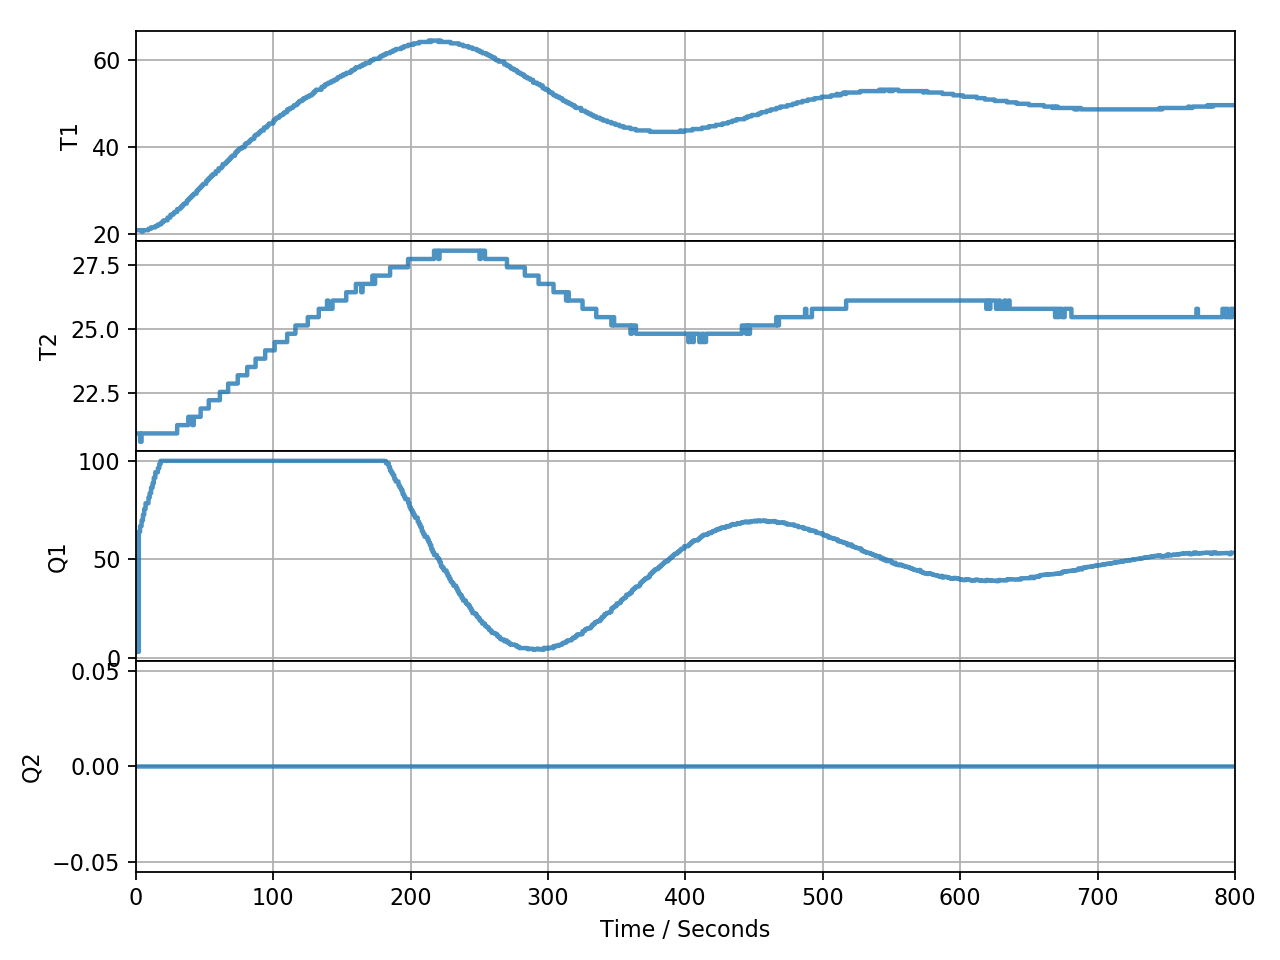

TCLab Model disconnected successfully.


In [8]:
from tclab import setup, clock, Historian, Plotter

TCLab = setup(connected=False, speedup = 20)

pid1 = PID()
pid1.Kp = 2
pid1.Ki = .1
pid1.Kd = 2

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, 800)
    for t in clock(800):
        lab.U1 = pid1.update(50, lab.T1)
        p.update(t)
        

## 4.10.3 Part 3. Tuning the PID Controller

Using the code you developed above, create a new cell below and test the following issues:

1. What happens when Ki = 0?
2. What happens when Ki = 0.1 and Kd = 3?

Describe the benefits of integral and derivative action.

<!--NAVIGATION-->
< [4.3 PID Control](https://jckantor.github.io/CBE32338/04.03-PID_Control.html) | [Contents](toc.html) | [4.11 Lab Assignment 4: PI Control](https://jckantor.github.io/CBE32338/04.11-Lab-Assignment-PI-Control.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE32338/blob/master/docs/04.10-Lab-Assignment-PID-Control.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE32338/04.10-Lab-Assignment-PID-Control.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>